## Метрические. Ноутбук составлен по моитвам лекций профессора Воронцова по ML для МФТИ и ШАД

In [1]:
import matplotlib.pyplot as plt
import random
from random import uniform
import math
from math import cos, sin, pi
import numpy as np

### 1. KNN

Построим модель линейной регрессии и обучим ее с помощью метода Stochastic Gradient Descent, реализовав его тут же

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, Y = make_classification(n_samples=200, n_features=2, 
                           n_informative=2, n_classes=3, 
                           n_redundant=0,
                           n_clusters_per_class=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=50)

/tmp/ipykernel_30744/4082386135.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(fig)


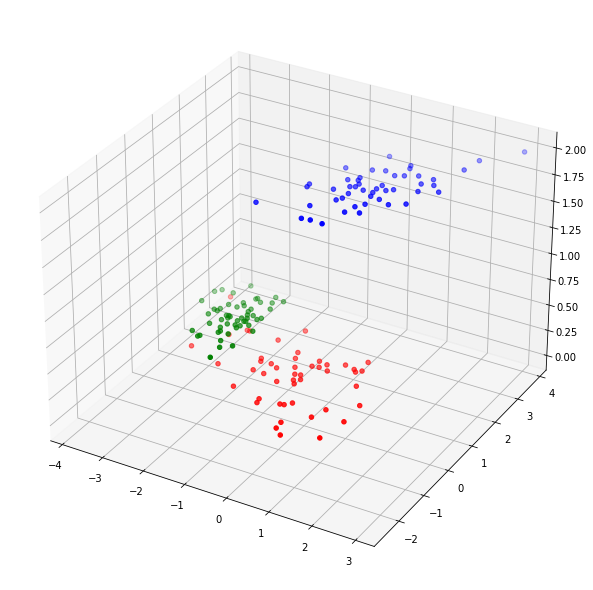

In [3]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy


fig = pylab.figure(figsize=(8, 8))
axes = Axes3D(fig)
axes.scatter3D(X_train[np.where(Y_train==0), 0], X_train[np.where(Y_train==0), 1], Y_train[np.where(Y_train==0)], c = 'r')
axes.scatter3D(X_train[np.where(Y_train==1), 0], X_train[np.where(Y_train==1), 1], Y_train[np.where(Y_train==1)], c = 'g')
axes.scatter3D(X_train[np.where(Y_train==2), 0], X_train[np.where(Y_train==2), 1], Y_train[np.where(Y_train==2)], c = 'b')
pylab.show()

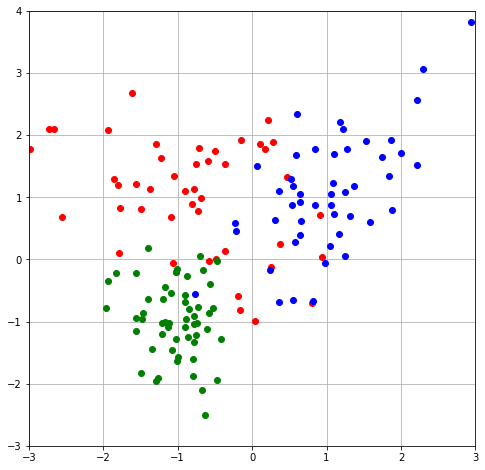

In [4]:
fig = plt.figure(figsize=(8, 8))
plt.plot(X_train[np.where(Y_train==0), 0], X_train[np.where(Y_train==0), 1], 'ro')
plt.plot(X_train[np.where(Y_train==1), 0], X_train[np.where(Y_train==1), 1], 'go')
plt.plot(X_train[np.where(Y_train==2), 0], X_train[np.where(Y_train==2), 1], 'bo')
plt.grid()
plt.axis([-3, 3, -3, 4])
plt.show()

In [5]:
def eucl_dist(x_test, x_train):
    x_test = np.array(x_test)
    x_train = np.array(x_train)
    arrays = [x_test for i in range(x_train.shape[0])]
    x_test = np.stack(arrays, axis = 1)
    return np.power(np.sum(np.power(x_test - x_train, 2), axis = 2), 1/2)

In [6]:
class my_KNN:
    
    def __init__(self, X_train, Y_train, k = 3):
        self.X_train = X_train
        self.Y_train = Y_train
        self.k = k
    
    def predict(self, X_test):
        distances = eucl_dist(X_test, X_train)
        arrays = [self.Y_train for i in range(X_test.shape[0])]
        Y_test = np.stack(arrays, axis = 0)
        # print("Y_test.shape = ", Y_test.shape)
        # print("distances.shape = ", distances.shape)
        # print("np.argsort(distances, axis = 1).shape = ", np.argsort(distances, axis = 1).shape)
        # print(np.argsort(distances, axis = 1)[0])
        # print(np.take_along_axis(distances, np.argsort(distances, axis = 1), axis = 1))
        # print(np.take_along_axis(Y_test, np.argsort(distances, axis = 1), axis = 1)[:, :self.k])
        # print(np.median(np.take_along_axis(Y_test, np.argsort(distances, axis = 1), axis = 1)[:, :self.k], axis = 1))
        return np.median(np.take_along_axis(Y_test, np.argsort(distances, axis = 1), axis = 1)[:, :self.k], axis = 1)

In [7]:
cls3 = my_KNN(X_train, Y_train, k = 3)
cls5 = my_KNN(X_train, Y_train, k = 5)
cls10 = my_KNN(X_train, Y_train, k = 10)
cls15 = my_KNN(X_train, Y_train, k = 15)

In [8]:
from mlxtend.plotting import plot_decision_regions
from matplotlib import gridspec

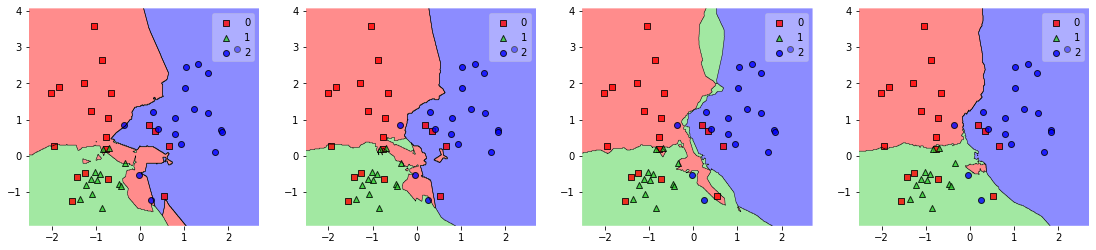

In [9]:
fig, gs = plt.figure(figsize=(19, 4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

plot_decision_regions(X_test, Y_test, cls3, ax=ax[0], colors = 'red,limegreen,blue,gray,cyan', zoom_factor = 2)
plot_decision_regions(X_test, Y_test, cls5, ax=ax[1], colors = 'red,limegreen,blue,gray,cyan', zoom_factor = 2)
plot_decision_regions(X_test, Y_test, cls10, ax=ax[2], colors = 'red,limegreen,blue,gray,cyan', zoom_factor = 2)
plot_decision_regions(X_test, Y_test, cls15, ax=ax[3], colors = 'red,limegreen,blue,gray,cyan', zoom_factor = 2)

plt.show()